* Sélection de 10 % du jeu de données
* Encodage cible et variables
* Rapide exploration du jeu de donnée 10% à 10 variables (statistique descriptive, graphiques, VIF)
* Modélisation 1 : jeu de données deséquilibré (nécessité d'entrainer sur jeu de donnéesavec classes de la cible équilibrés, indicateur auroc au lieu d'accuracy) 

* input : r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/df.csv"
* output : '/Users/ndergham/Desktop/OpenClassrooms/P7/data/df_eq.csv''


# Introduction

## Problématique

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser",  qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.
L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

## Données

* 10 fichiers CSV
* Vous aurez sûrement besoin de joindre les différentes tables entre elles.

## Votre mission

Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.
Michaël, votre manager, vous incite à sélectionner un kernel Kaggle pour vous faciliter la préparation des données nécessaires à l’élaboration du modèle de scoring. Vous analyserez ce kernel et l’adapterez pour vous assurer qu’il répond aux besoins de votre mission.

Vous pourrez ainsi vous focaliser sur l’élaboration du modèle, son optimisation et sa compréhension.

Spécifications du dashboard
Michaël vous a fourni des spécifications pour le dashboard interactif. Celui-ci devra contenir au minimum les fonctionnalités suivantes :

Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

## Imports et paramétrage

In [1]:
#Importation des librairies utiles pour le projet :

#built in
import statistics
import os, sys, time, random
from collections import Counter

#data
import pandas as pd
import numpy as np

#stats
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

#viz
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from PIL import Image

# modelisation
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD 
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

# models

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
import sklearn.metrics
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import cluster
import scipy.cluster.hierarchy as shc
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


# Metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics.cluster import adjusted_rand_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#from functions import *

C:\Users\ndergham\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
pd.set_option("display.max_rows", None)

In [3]:
#Importation du jeu de données utiles pour le projet :

df1 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/df.csv")


# Comprendre la forme et la structure des données

## Jeux de données

On va regarder rapidement les informations contenues dans les différents jeux de données pour savoir lesquelles sont intéressantes 

In [4]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education
2,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special
3,100006,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special
4,100007,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special


In [5]:
df1.shape

(307511, 11)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   FLAG_OWN_CAR         307511 non-null  object 
 4   FLAG_OWN_REALTY      307511 non-null  object 
 5   CNT_CHILDREN         307511 non-null  int64  
 6   AMT_INCOME_TOTAL     307511 non-null  float64
 7   AMT_CREDIT           307511 non-null  float64
 8   AMT_ANNUITY          307499 non-null  float64
 9   AMT_GOODS_PRICE      307233 non-null  float64
 10  NAME_EDUCATION_TYPE  307511 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 25.8+ MB


In [7]:
df1.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_EDUCATION_TYPE     object
dtype: object

In [8]:
df1.dtypes.value_counts()

object     4
float64    4
int64      3
dtype: int64

In [9]:
# Sélection de 10 % du jeu de données:

df1 = df1.sample(frac=0.1)

In [10]:
df1.shape

(30751, 11)

In [11]:
df1 = df1.reset_index()

## Encodage des variables catégorielles

In [12]:
# Sélection des variables catégorielles :

cols_cat = ['NAME_CONTRACT_TYPE', "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_EDUCATION_TYPE"]
df_cat = df1[cols_cat]
df_cat.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE
0,Cash loans,N,Y,Higher education
1,Cash loans,N,Y,Secondary / secondary special
2,Cash loans,Y,Y,Secondary / secondary special
3,Cash loans,Y,N,Secondary / secondary special
4,Cash loans,N,N,Higher education


In [13]:
# Encodage des variables catégorielles :

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#perform one-hot encoding on 'team' column 
encoder_df = encoder.fit_transform(df_cat)

encoder_df = pd.DataFrame(encoder_df)

In [14]:
# Renomage des variables catégorielles encodées :

encoder_df = encoder_df.rename({0: 'NAME_CONTRACT_TYPE_Cash loans',1: 'NAME_CONTRACT_TYPE_Revolving loans',
                                2: 'FLAG_OWN_CAR_No',3: 'FLAG_OWN_CAR_Yes',
                                4: 'FLAG_OWN_REALTY_No',5: 'FLAG_OWN_REALTY_Yes',
                                6: 'NAME_EDUCATION_TYPE_Academic degree',7: 'NAME_EDUCATION_TYPE_Higher education',
                                8: 'NAME_EDUCATION_TYPE_Incomplete higher',9: 'NAME_EDUCATION_TYPE_Lower secondary',
                                10: 'NAME_EDUCATION_TYPE_Secondary / secondary special'}, axis=1)

In [15]:
encoder_df.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_No,FLAG_OWN_CAR_Yes,FLAG_OWN_REALTY_No,FLAG_OWN_REALTY_Yes,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
encoder_df.shape

(30751, 11)

In [17]:
df1.head()

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE
0,88641,202920,0,Cash loans,N,Y,0,112500.0,195543.0,11353.5,148500.0,Higher education
1,71215,182599,0,Cash loans,N,Y,0,270000.0,220500.0,24934.5,220500.0,Secondary / secondary special
2,99851,215919,0,Cash loans,Y,Y,2,270000.0,577147.5,29466.0,459000.0,Secondary / secondary special
3,295065,441840,0,Cash loans,Y,N,0,180000.0,1288350.0,37800.0,1125000.0,Secondary / secondary special
4,169290,296214,0,Cash loans,N,N,2,121500.0,640080.0,24259.5,450000.0,Higher education


In [18]:
# On fusionne les colonnes encodées one-hot avec le jeu de donnée :

df_concat = df1.join(encoder_df, how='inner')

In [19]:
df_concat.head()

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_No,FLAG_OWN_CAR_Yes,FLAG_OWN_REALTY_No,FLAG_OWN_REALTY_Yes,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,88641,202920,0,Cash loans,N,Y,0,112500.0,195543.0,11353.5,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,71215,182599,0,Cash loans,N,Y,0,270000.0,220500.0,24934.5,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,99851,215919,0,Cash loans,Y,Y,2,270000.0,577147.5,29466.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,295065,441840,0,Cash loans,Y,N,0,180000.0,1288350.0,37800.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,169290,296214,0,Cash loans,N,N,2,121500.0,640080.0,24259.5,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   index                                              30751 non-null  int64  
 1   SK_ID_CURR                                         30751 non-null  int64  
 2   TARGET                                             30751 non-null  int64  
 3   NAME_CONTRACT_TYPE                                 30751 non-null  object 
 4   FLAG_OWN_CAR                                       30751 non-null  object 
 5   FLAG_OWN_REALTY                                    30751 non-null  object 
 6   CNT_CHILDREN                                       30751 non-null  int64  
 7   AMT_INCOME_TOTAL                                   30751 non-null  float64
 8   AMT_CREDIT                                         30751 non-null  float64
 9   AMT_AN

In [21]:
# On enlève les variables catégorielles non encodées :

cols = ["TARGET","CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "NAME_CONTRACT_TYPE_Cash loans",
        "NAME_CONTRACT_TYPE_Revolving loans", "FLAG_OWN_CAR_No", "FLAG_OWN_CAR_Yes", "FLAG_OWN_REALTY_No", "FLAG_OWN_REALTY_Yes",
        "NAME_EDUCATION_TYPE_Academic degree", "NAME_EDUCATION_TYPE_Higher education", "NAME_EDUCATION_TYPE_Higher education", 
        "NAME_EDUCATION_TYPE_Incomplete higher",]
df = df_concat[cols]
df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_No,FLAG_OWN_CAR_Yes,FLAG_OWN_REALTY_No,FLAG_OWN_REALTY_Yes,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher
0,0,0,112500.0,195543.0,11353.5,148500.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0,0,270000.0,220500.0,24934.5,220500.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,2,270000.0,577147.5,29466.0,459000.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0,180000.0,1288350.0,37800.0,1125000.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2,121500.0,640080.0,24259.5,450000.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [22]:
df.to_csv('/Users/ndergham/Desktop/OpenClassrooms/P7/data/df_10.csv', index = False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   TARGET                                 30751 non-null  int64  
 1   CNT_CHILDREN                           30751 non-null  int64  
 2   AMT_INCOME_TOTAL                       30751 non-null  float64
 3   AMT_CREDIT                             30751 non-null  float64
 4   AMT_ANNUITY                            30751 non-null  float64
 5   AMT_GOODS_PRICE                        30725 non-null  float64
 6   NAME_CONTRACT_TYPE_Cash loans          30751 non-null  float64
 7   NAME_CONTRACT_TYPE_Revolving loans     30751 non-null  float64
 8   FLAG_OWN_CAR_No                        30751 non-null  float64
 9   FLAG_OWN_CAR_Yes                       30751 non-null  float64
 10  FLAG_OWN_REALTY_No                     30751 non-null  float64
 11  FL

## Définition cible et variables

In [24]:
df1 = df.dropna()

In [25]:
# Définition de la cible y :

y = df1.TARGET

In [26]:
# Création de X :

cols = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "NAME_CONTRACT_TYPE_Cash loans",
        "NAME_CONTRACT_TYPE_Revolving loans", "FLAG_OWN_CAR_No", "FLAG_OWN_CAR_Yes", "FLAG_OWN_REALTY_No", "FLAG_OWN_REALTY_Yes",
        "NAME_EDUCATION_TYPE_Academic degree", "NAME_EDUCATION_TYPE_Higher education", "NAME_EDUCATION_TYPE_Higher education", 
        "NAME_EDUCATION_TYPE_Incomplete higher",]
X = df1[cols]
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_No,FLAG_OWN_CAR_Yes,FLAG_OWN_REALTY_No,FLAG_OWN_REALTY_Yes,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher
0,0,112500.0,195543.0,11353.5,148500.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0,270000.0,220500.0,24934.5,220500.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,270000.0,577147.5,29466.0,459000.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,180000.0,1288350.0,37800.0,1125000.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,121500.0,640080.0,24259.5,450000.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


## Etude statistique

In [27]:
X.shape

(30725, 17)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 30750
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CNT_CHILDREN                           30725 non-null  int64  
 1   AMT_INCOME_TOTAL                       30725 non-null  float64
 2   AMT_CREDIT                             30725 non-null  float64
 3   AMT_ANNUITY                            30725 non-null  float64
 4   AMT_GOODS_PRICE                        30725 non-null  float64
 5   NAME_CONTRACT_TYPE_Cash loans          30725 non-null  float64
 6   NAME_CONTRACT_TYPE_Revolving loans     30725 non-null  float64
 7   FLAG_OWN_CAR_No                        30725 non-null  float64
 8   FLAG_OWN_CAR_Yes                       30725 non-null  float64
 9   FLAG_OWN_REALTY_No                     30725 non-null  float64
 10  FLAG_OWN_REALTY_Yes                    30725 non-null  float64
 11  NA

In [29]:
X.dtypes

CNT_CHILDREN                               int64
AMT_INCOME_TOTAL                         float64
AMT_CREDIT                               float64
AMT_ANNUITY                              float64
AMT_GOODS_PRICE                          float64
NAME_CONTRACT_TYPE_Cash loans            float64
NAME_CONTRACT_TYPE_Revolving loans       float64
FLAG_OWN_CAR_No                          float64
FLAG_OWN_CAR_Yes                         float64
FLAG_OWN_REALTY_No                       float64
FLAG_OWN_REALTY_Yes                      float64
NAME_EDUCATION_TYPE_Academic degree      float64
NAME_EDUCATION_TYPE_Higher education     float64
NAME_EDUCATION_TYPE_Higher education     float64
NAME_EDUCATION_TYPE_Higher education     float64
NAME_EDUCATION_TYPE_Higher education     float64
NAME_EDUCATION_TYPE_Incomplete higher    float64
dtype: object

In [30]:
X.nunique()

CNT_CHILDREN                                9
AMT_INCOME_TOTAL                          592
AMT_CREDIT                               2847
AMT_ANNUITY                              7286
AMT_GOODS_PRICE                           465
NAME_CONTRACT_TYPE_Cash loans               2
NAME_CONTRACT_TYPE_Revolving loans          2
FLAG_OWN_CAR_No                             2
FLAG_OWN_CAR_Yes                            2
FLAG_OWN_REALTY_No                          2
FLAG_OWN_REALTY_Yes                         2
NAME_EDUCATION_TYPE_Academic degree         2
NAME_EDUCATION_TYPE_Higher education        2
NAME_EDUCATION_TYPE_Higher education        2
NAME_EDUCATION_TYPE_Higher education        2
NAME_EDUCATION_TYPE_Higher education        2
NAME_EDUCATION_TYPE_Incomplete higher       2
dtype: int64

In [31]:
X.describe(include = np.number)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_No,FLAG_OWN_CAR_Yes,FLAG_OWN_REALTY_No,FLAG_OWN_REALTY_Yes,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher
count,30725.000000,3.072500e+04,3.072500e+04,30725.000000,3.072500e+04,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000
mean,0.416176,1.684253e+05,6.003420e+05,27163.310822,5.398993e+05,0.903662,0.096338,0.659756,0.340244,0.302067,0.697933,0.000521,0.244199,0.244199,0.244199,0.244199,0.032710
std,0.725899,9.535078e+04,4.017014e+05,14440.599619,3.693983e+05,0.295060,0.295060,0.473799,0.473799,0.459161,0.459161,0.022814,0.429618,0.429618,0.429618,0.429618,0.177878
min,0.000000,2.610000e+04,4.500000e+04,2295.000000,4.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16627.500000,2.385000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.440000e+05,5.175000e+05,24939.000000,4.500000e+05,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.025000e+05,8.086500e+05,34663.500000,6.795000e+05,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,2.250000e+06,4.050000e+06,225000.000000,4.050000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Graphiques

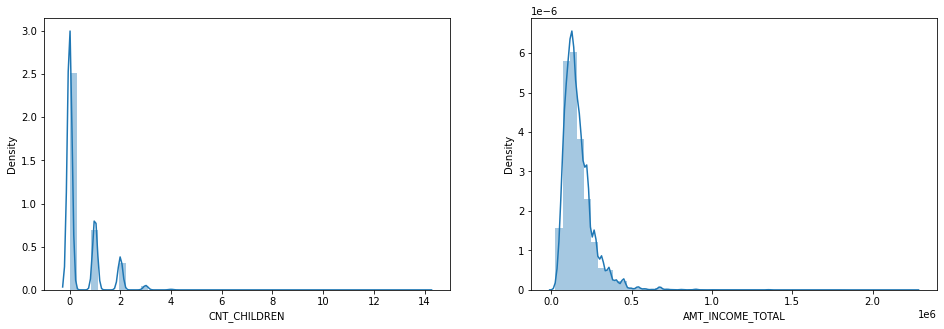

In [32]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X['CNT_CHILDREN'])
plt.subplot(1,2,2)
sns.distplot(X['AMT_INCOME_TOTAL'])
plt.show()

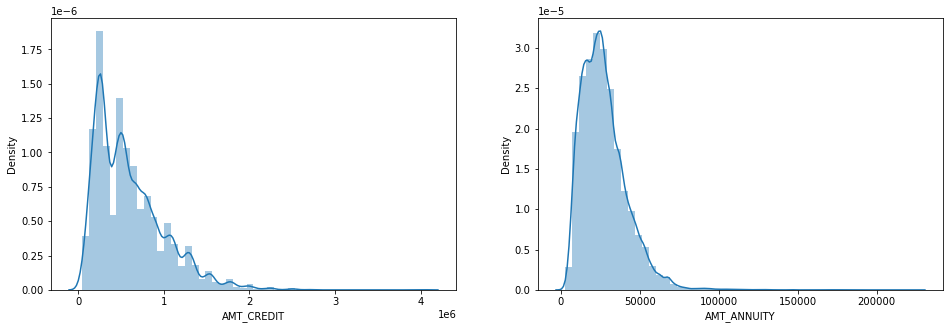

In [33]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X['AMT_CREDIT'])
plt.subplot(1,2,2)
sns.distplot(X['AMT_ANNUITY'])
plt.show()

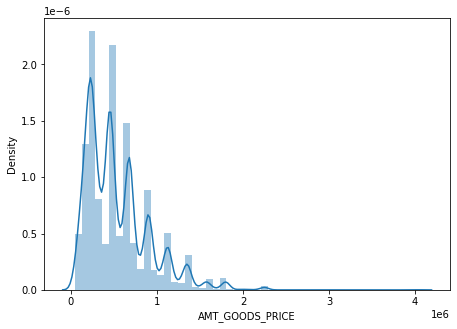

In [34]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X['AMT_GOODS_PRICE'])

plt.show()

### Boîtes à moustaches

<AxesSubplot:xlabel='CNT_CHILDREN'>

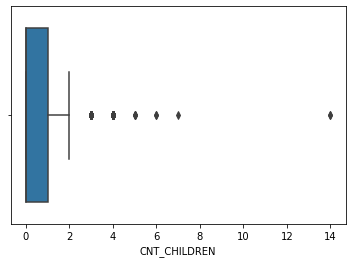

In [35]:
sns.boxplot(X['CNT_CHILDREN'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

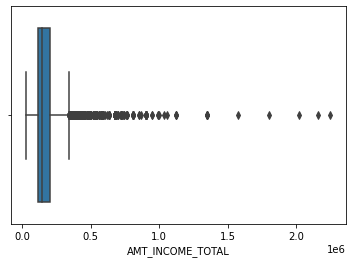

In [36]:
sns.boxplot(X['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AMT_CREDIT'>

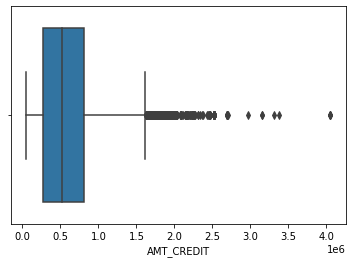

In [37]:
sns.boxplot(X['AMT_CREDIT'])

<AxesSubplot:xlabel='AMT_ANNUITY'>

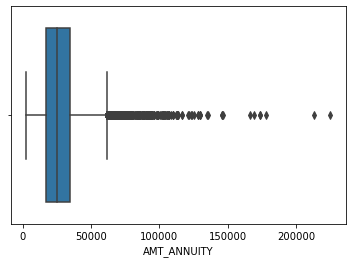

In [38]:
sns.boxplot(X['AMT_ANNUITY'])

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

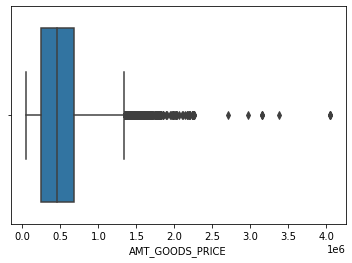

In [39]:
sns.boxplot(X['AMT_GOODS_PRICE'])

## VIF

Le facteur d'inflation de la variance (VIF) quantifie la gravité de la multicollinéarité dans une analyse de régression des moindres carrés ordinaires. 

Il fournit un indice qui mesure de combien la variance (le carré de l'écart type de l'estimation) d'un coefficient de régression estimé est augmentée à cause de la colinéarité. 

La racine carrée du facteur d'inflation de la variance indique de combien l'erreur standard augmente par rapport à ce qu'elle serait si cette variable n'avait aucune corrélation avec les autres variables prédictives du modèle.

In [40]:
#VIF dataframe
X_na = X.dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X_na.columns
vif_data["feature"] = vif_data["feature"].dropna()

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_na.values, i)
                          for i in range(len(X_na.columns))]
  
print(vif_data)

                                  feature        VIF
0                            CNT_CHILDREN   1.016407
1                        AMT_INCOME_TOTAL   1.380956
2                              AMT_CREDIT  41.150258
3                             AMT_ANNUITY   2.795221
4                         AMT_GOODS_PRICE  41.874235
5           NAME_CONTRACT_TYPE_Cash loans        inf
6      NAME_CONTRACT_TYPE_Revolving loans        inf
7                         FLAG_OWN_CAR_No        inf
8                        FLAG_OWN_CAR_Yes        inf
9                      FLAG_OWN_REALTY_No        inf
10                    FLAG_OWN_REALTY_Yes        inf
11    NAME_EDUCATION_TYPE_Academic degree   1.001019
12   NAME_EDUCATION_TYPE_Higher education        inf
13   NAME_EDUCATION_TYPE_Higher education        inf
14   NAME_EDUCATION_TYPE_Higher education        inf
15   NAME_EDUCATION_TYPE_Higher education        inf
16  NAME_EDUCATION_TYPE_Incomplete higher   1.016463


# Modélisation

On va implémenter plusieurs modèles de classification et comparer leur performance pour connaitre la meilleur configuration.

En plus des différents modèles, on va comparer :

- l'usage ou non d'un standard scaler
- l'usage ou non d'un reducteur dimensionnel (PCA, LDA, TruncatedSVD)

## Grid search

On créé un fonction pour afficher les résultats de la grid search triés par **mean_test_score** du plus grand au plus petit.

Le **mean_test_score** est la moyenne des score de test des modèles prédictifs entrainés et testé sur chaque "fold" de la validation croisée.

In [41]:
def resultize(grid, model = "", data ="") : 
    """ """
    
    res = pd.DataFrame(grid.cv_results_)
    res["model"] = model
    cols = [i for i in res.columns if "split" not in i  ]
    
    res
    
    
    return res[cols].sort_values("rank_test_score", ascending=True)

In [42]:
# Liste des scaler à tester

scaler_list = [StandardScaler(),  
               "passthrough"]

In [43]:
# Liste des reducteur dimensionnel à tester

dimensional_reduction_list = [PCA(2),
                              LDA(n_components = 2),
                              TruncatedSVD(n_components = 2),
                             "passthrough"]

## Jeu de données non-équilibré

### DummyClassifier

In [44]:
y.value_counts(normalize = True)

0    0.919902
1    0.080098
Name: TARGET, dtype: float64

On peut voir que les classes du jeu de données sont déséquilibrées.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
# On crée la grille de paramètres
param_grid = {"scaler" : scaler_list, 
              "reductor" : dimensional_reduction_list,
              "estimator" : [DummyClassifier()]
            
            
             }

In [47]:
# On crée le pipeline

pipe = Pipeline([
     ("scaler", StandardScaler()),
    ("reductor", PCA(2)),
    ("estimator", DummyClassifier())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('reductor', PCA(n_components=2)),
                ('estimator', DummyClassifier())])

In [48]:
grid = GridSearchCV(pipe, param_grid, cv = 10, verbose=3 , n_jobs=-1)
grid.fit(X_train, y_train)
res = resultize(grid, model = "dummy")
# ALL_RES = pd.concat([ALL_RES, res.head()], axis=0, ignore_index=True)
res

Fitting 10 folds for each of 8 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_reductor,param_scaler,params,mean_test_score,std_test_score,rank_test_score,model
0,0.161299,0.019653,0.003126,0.006253,DummyClassifier(),PCA(n_components=2),StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': P...",0.919894,0.000122,1,dummy
1,0.129810,0.009955,0.004684,0.007155,DummyClassifier(),PCA(n_components=2),passthrough,"{'estimator': DummyClassifier(), 'reductor': P...",0.919894,0.000122,1,dummy
4,0.189769,0.015836,0.006252,0.007657,DummyClassifier(),TruncatedSVD(),StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': T...",0.919894,0.000122,1,dummy
5,0.130481,0.044199,0.004844,0.007410,DummyClassifier(),TruncatedSVD(),passthrough,"{'estimator': DummyClassifier(), 'reductor': T...",0.919894,0.000122,1,dummy
6,0.039065,0.007810,0.003124,0.006249,DummyClassifier(),passthrough,StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': '...",0.919894,0.000122,1,dummy
7,0.007813,0.007813,0.000000,0.000000,DummyClassifier(),passthrough,passthrough,"{'estimator': DummyClassifier(), 'reductor': '...",0.919894,0.000122,1,dummy
2,0.035941,0.007158,0.000000,0.000000,DummyClassifier(),LinearDiscriminantAnalysis(n_components=2),StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': L...",NaN,NaN,7,dummy
3,0.010940,0.007162,0.000000,0.000000,DummyClassifier(),LinearDiscriminantAnalysis(n_components=2),passthrough,"{'estimator': DummyClassifier(), 'reductor': L...",NaN,NaN,8,dummy


L'accuracy des différentes configurations semble très élevée. Vu qu'il s'agit d'un modèle "Dummy", ce n'est pas normal. 
L'accuracy n'est pas la bonne métric à suivre. 
On va faire la même chose mais en utilisant le *roc_auc_score*. Il s'agit de l'aire sous la courbe ROC AUC.

In [49]:
grid = GridSearchCV(pipe, param_grid, scoring = "roc_auc", cv = 10, verbose=3 , n_jobs=-1)
grid.fit(X_train, y_train)
res = resultize(grid, model = "dummy")
# ALL_RES = pd.concat([ALL_RES, res.head()], axis=0, ignore_index=True)
res

Fitting 10 folds for each of 8 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_reductor,param_scaler,params,mean_test_score,std_test_score,rank_test_score,model
0,0.165583,0.015244,0.008000,0.004977,DummyClassifier(),PCA(n_components=2),StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': P...",0.5,0.0,1,dummy
1,0.125324,0.014801,0.004687,0.007159,DummyClassifier(),PCA(n_components=2),passthrough,"{'estimator': DummyClassifier(), 'reductor': P...",0.5,0.0,1,dummy
4,0.190622,0.006253,0.006250,0.007655,DummyClassifier(),TruncatedSVD(),StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': T...",0.5,0.0,1,dummy
5,0.136137,0.040117,0.001563,0.004688,DummyClassifier(),TruncatedSVD(),passthrough,"{'estimator': DummyClassifier(), 'reductor': T...",0.5,0.0,1,dummy
6,0.037229,0.008488,0.004327,0.006127,DummyClassifier(),passthrough,StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': '...",0.5,0.0,1,dummy
7,0.008971,0.007535,0.001863,0.004675,DummyClassifier(),passthrough,passthrough,"{'estimator': DummyClassifier(), 'reductor': '...",0.5,0.0,1,dummy
2,0.037501,0.007655,0.000000,0.000000,DummyClassifier(),LinearDiscriminantAnalysis(n_components=2),StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': L...",NaN,NaN,7,dummy
3,0.017188,0.004688,0.000000,0.000000,DummyClassifier(),LinearDiscriminantAnalysis(n_components=2),passthrough,"{'estimator': DummyClassifier(), 'reductor': L...",NaN,NaN,8,dummy


Les resultats sont plus conformes à ce qu'on attendait avec un "Dummy". 
Il faut utiliser la métric roc_auc_score plutôt que l'accuracy pour ce problème.

### Random Forest

In [50]:
# On crée la grille de paramètres

param_grid = {"scaler" : scaler_list, 
              "reductor" : dimensional_reduction_list,
              "estimator" : [RandomForestClassifier(min_samples_split = 5, min_samples_leaf = 1, max_depth = 20, n_estimators = 500)],
              
            
             }

In [51]:
# On crée le pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("reductor", PCA(2)),
    ("estimator", RandomForestClassifier(min_samples_split = 5, min_samples_leaf = 1, max_depth = 20, n_estimators = 500))
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('reductor', PCA(n_components=2)),
                ('estimator',
                 RandomForestClassifier(max_depth=20, min_samples_split=5,
                                        n_estimators=500))])

In [52]:
grid = GridSearchCV(pipe, param_grid, cv = 10, verbose=3 , n_jobs=-1)
grid.fit(X_train, y_train)
res = resultize(grid, model = "Random Forest")
# ALL_RES = pd.concat([ALL_RES, res.head()], axis=0, ignore_index=True)
res

Fitting 10 folds for each of 8 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_reductor,param_scaler,params,mean_test_score,std_test_score,rank_test_score,model
4,33.035866,0.865405,0.491375,0.086082,"RandomForestClassifier(max_depth=20, min_sampl...",TruncatedSVD(),StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,0.919650,0.000375,1,Random Forest
0,31.339103,1.284295,0.469042,0.024030,"RandomForestClassifier(max_depth=20, min_sampl...",PCA(n_components=2),StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,0.919447,0.000364,2,Random Forest
6,21.877534,0.845813,0.518776,0.016779,"RandomForestClassifier(max_depth=20, min_sampl...",passthrough,StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,0.919447,0.000446,2,Random Forest
7,20.233370,3.351072,0.432746,0.114375,"RandomForestClassifier(max_depth=20, min_sampl...",passthrough,passthrough,{'estimator': RandomForestClassifier(max_depth...,0.919365,0.000399,4,Random Forest
5,31.642254,0.927319,0.470644,0.057369,"RandomForestClassifier(max_depth=20, min_sampl...",TruncatedSVD(),passthrough,{'estimator': RandomForestClassifier(max_depth...,0.918592,0.000692,5,Random Forest
1,32.662338,0.958104,0.438953,0.015385,"RandomForestClassifier(max_depth=20, min_sampl...",PCA(n_components=2),passthrough,{'estimator': RandomForestClassifier(max_depth...,0.918511,0.000706,6,Random Forest
2,0.027300,0.001791,0.000000,0.000000,"RandomForestClassifier(max_depth=20, min_sampl...",LinearDiscriminantAnalysis(n_components=2),StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,NaN,NaN,7,Random Forest
3,0.016400,0.004080,0.000000,0.000000,"RandomForestClassifier(max_depth=20, min_sampl...",LinearDiscriminantAnalysis(n_components=2),passthrough,{'estimator': RandomForestClassifier(max_depth...,NaN,NaN,8,Random Forest


In [53]:
grid = GridSearchCV(pipe, param_grid, scoring = "roc_auc", cv = 10, verbose=3 , n_jobs=-1)
grid.fit(X_train, y_train)
res = resultize(grid, model = "Random Forest")
# ALL_RES = pd.concat([ALL_RES, res.head()], axis=0, ignore_index=True)
res


Fitting 10 folds for each of 8 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_reductor,param_scaler,params,mean_test_score,std_test_score,rank_test_score,model
7,20.402978,2.813756,0.462050,0.128658,"RandomForestClassifier(max_depth=20, min_sampl...",passthrough,passthrough,{'estimator': RandomForestClassifier(max_depth...,0.600866,0.019975,1,Random Forest
6,21.755734,0.637426,0.538220,0.025643,"RandomForestClassifier(max_depth=20, min_sampl...",passthrough,StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,0.600550,0.020341,2,Random Forest
5,31.705015,0.708033,0.446751,0.011350,"RandomForestClassifier(max_depth=20, min_sampl...",TruncatedSVD(),passthrough,{'estimator': RandomForestClassifier(max_depth...,0.557744,0.022842,3,Random Forest
1,34.448027,1.264761,0.484983,0.052881,"RandomForestClassifier(max_depth=20, min_sampl...",PCA(n_components=2),passthrough,{'estimator': RandomForestClassifier(max_depth...,0.556387,0.023673,4,Random Forest
0,34.474978,1.324684,0.479544,0.044180,"RandomForestClassifier(max_depth=20, min_sampl...",PCA(n_components=2),StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,0.555762,0.029099,5,Random Forest
4,33.536498,1.057505,0.456652,0.055523,"RandomForestClassifier(max_depth=20, min_sampl...",TruncatedSVD(),StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,0.553967,0.030188,6,Random Forest
2,0.030259,0.009524,0.000000,0.000000,"RandomForestClassifier(max_depth=20, min_sampl...",LinearDiscriminantAnalysis(n_components=2),StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,NaN,NaN,7,Random Forest
3,0.013902,0.008399,0.000000,0.000000,"RandomForestClassifier(max_depth=20, min_sampl...",LinearDiscriminantAnalysis(n_components=2),passthrough,{'estimator': RandomForestClassifier(max_depth...,NaN,NaN,8,Random Forest


Le score roc_auc est à peine plus élevé qu'avec un Dummy. On va équilibrer les classes du jeu et regarder l'influence sur le score roc_auc. 

## Jeu de données équilibré

### Création du jeu de données équilibré

In [54]:
df_1 = df_concat[df_concat["TARGET"] == 1]
df_1.head()

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_No,FLAG_OWN_CAR_Yes,FLAG_OWN_REALTY_No,FLAG_OWN_REALTY_Yes,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
23,71340,182733,1,Cash loans,Y,Y,0,112500.0,772686.0,25056.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
38,168629,295465,1,Cash loans,N,N,0,37273.5,168102.0,17352.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
40,54293,162901,1,Cash loans,N,Y,1,112500.0,781695.0,30420.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
44,96352,211857,1,Cash loans,Y,Y,0,180000.0,677664.0,34731.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45,242494,380704,1,Cash loans,N,Y,0,135000.0,450000.0,20979.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [55]:
df_1.shape

(2461, 23)

In [56]:
df_0 = df_concat[df_concat["TARGET"] == 0]

In [57]:
df_0.shape

(28290, 23)

In [58]:
df_0_selec = df_0.sample(n=df_1.shape[0])

In [59]:
df_0_selec.shape

(2461, 23)

In [60]:
# On fusionne les colonnes encodées one-hot avec le jeu de donnée df_raw :

df_eq = pd.concat([df_1, df_0_selec], axis=0, ignore_index = True)

In [61]:
df_eq.shape

(4922, 23)

In [62]:
df_eq.head()

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_No,FLAG_OWN_CAR_Yes,FLAG_OWN_REALTY_No,FLAG_OWN_REALTY_Yes,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,71340,182733,1,Cash loans,Y,Y,0,112500.0,772686.0,25056.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,168629,295465,1,Cash loans,N,N,0,37273.5,168102.0,17352.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,54293,162901,1,Cash loans,N,Y,1,112500.0,781695.0,30420.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,96352,211857,1,Cash loans,Y,Y,0,180000.0,677664.0,34731.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,242494,380704,1,Cash loans,N,Y,0,135000.0,450000.0,20979.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [63]:
df_eq = df_eq.dropna()

In [64]:
# Définition de la cible y :

y_eq = df_eq.TARGET

In [65]:
y_eq.value_counts(normalize = True)

1    0.500305
0    0.499695
Name: TARGET, dtype: float64

Les classes sont équilibrées

In [66]:
# Création de X_eq :

cols = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "NAME_CONTRACT_TYPE_Cash loans",
        "NAME_CONTRACT_TYPE_Revolving loans", "FLAG_OWN_CAR_No", "FLAG_OWN_CAR_Yes", "FLAG_OWN_REALTY_No", "FLAG_OWN_REALTY_Yes",
        "NAME_EDUCATION_TYPE_Academic degree", "NAME_EDUCATION_TYPE_Higher education", "NAME_EDUCATION_TYPE_Higher education", 
        "NAME_EDUCATION_TYPE_Incomplete higher",]
X_eq = df_eq[cols]
X_eq.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_No,FLAG_OWN_CAR_Yes,FLAG_OWN_REALTY_No,FLAG_OWN_REALTY_Yes,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher
0,0,112500.0,772686.0,25056.0,553500.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,37273.5,168102.0,17352.0,148500.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,112500.0,781695.0,30420.0,652500.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0,180000.0,677664.0,34731.0,585000.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,135000.0,450000.0,20979.0,450000.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
df_eq.to_csv('/Users/ndergham/Desktop/OpenClassrooms/P7/data/df_eq.csv', index = False)

On va entrainer nos modèles avec le jeu de données équilibré

### Dummy

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_eq, y_eq, test_size=0.2)

In [69]:
# On crée la grille de paramètres
param_grid = {"scaler" : scaler_list, 
              "reductor" : dimensional_reduction_list,
              "estimator" : [DummyClassifier()]
            
            
             }

In [70]:
# On crée le pipeline

pipe = Pipeline([
     ("scaler", StandardScaler()),
    ("reductor", PCA(2)),
    ("estimator", DummyClassifier())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('reductor', PCA(n_components=2)),
                ('estimator', DummyClassifier())])

In [71]:
grid = GridSearchCV(pipe, param_grid, scoring = "roc_auc", cv = 10, verbose=3 , n_jobs=-1)
grid.fit(X_train, y_train)
res = resultize(grid, model = "dummy")
# ALL_RES = pd.concat([ALL_RES, res.head()], axis=0, ignore_index=True)
res

Fitting 10 folds for each of 8 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_reductor,param_scaler,params,mean_test_score,std_test_score,rank_test_score,model
0,0.015204,0.001938,0.004501,0.000501,DummyClassifier(),PCA(n_components=2),StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': P...",0.5,0.0,1,dummy
1,0.012402,0.002107,0.004996,0.000449,DummyClassifier(),PCA(n_components=2),passthrough,"{'estimator': DummyClassifier(), 'reductor': P...",0.5,0.0,1,dummy
4,0.013213,0.008496,0.003126,0.006252,DummyClassifier(),TruncatedSVD(),StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': T...",0.5,0.0,1,dummy
5,0.013432,0.006959,0.004074,0.006316,DummyClassifier(),TruncatedSVD(),passthrough,"{'estimator': DummyClassifier(), 'reductor': T...",0.5,0.0,1,dummy
6,0.008720,0.007758,0.005304,0.006857,DummyClassifier(),passthrough,StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': '...",0.5,0.0,1,dummy
7,0.001594,0.004781,0.001664,0.004663,DummyClassifier(),passthrough,passthrough,"{'estimator': DummyClassifier(), 'reductor': '...",0.5,0.0,1,dummy
2,0.009698,0.001675,0.000000,0.000000,DummyClassifier(),LinearDiscriminantAnalysis(n_components=2),StandardScaler(),"{'estimator': DummyClassifier(), 'reductor': L...",NaN,NaN,7,dummy
3,0.003899,0.001044,0.000000,0.000000,DummyClassifier(),LinearDiscriminantAnalysis(n_components=2),passthrough,"{'estimator': DummyClassifier(), 'reductor': L...",NaN,NaN,8,dummy


### Random Forest

In [72]:
# On crée la grille de paramètres

param_grid = {"scaler" : scaler_list, 
              "reductor" : dimensional_reduction_list,
              "estimator" : [RandomForestClassifier(min_samples_split = 5, min_samples_leaf = 1, max_depth = 20, n_estimators = 500)],
              
            
             }

In [73]:
# On crée le pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("reductor", PCA(2)),
    ("estimator", RandomForestClassifier(min_samples_split = 5, min_samples_leaf = 1, max_depth = 20, n_estimators = 500))
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('reductor', PCA(n_components=2)),
                ('estimator',
                 RandomForestClassifier(max_depth=20, min_samples_split=5,
                                        n_estimators=500))])

In [74]:
grid = GridSearchCV(pipe, param_grid, scoring = "roc_auc", cv = 10, verbose=3 , n_jobs=-1)
grid.fit(X_eq, y_eq)
res = resultize(grid, model = "Random Forest")
# ALL_RES = pd.concat([ALL_RES, res.head()], axis=0, ignore_index=True)
res


Fitting 10 folds for each of 8 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_reductor,param_scaler,params,mean_test_score,std_test_score,rank_test_score,model
6,6.281471,0.669400,0.240248,0.035415,"RandomForestClassifier(max_depth=20, min_sampl...",passthrough,StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,0.564417,0.019503,1,Random Forest
7,5.562054,0.466197,0.192768,0.036306,"RandomForestClassifier(max_depth=20, min_sampl...",passthrough,passthrough,{'estimator': RandomForestClassifier(max_depth...,0.564176,0.019372,2,Random Forest
4,7.024083,0.284423,0.219093,0.032218,"RandomForestClassifier(max_depth=20, min_sampl...",TruncatedSVD(),StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,0.548739,0.026658,3,Random Forest
0,6.941435,0.393020,0.192699,0.007006,"RandomForestClassifier(max_depth=20, min_sampl...",PCA(n_components=2),StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,0.546368,0.027149,4,Random Forest
5,7.278896,0.142876,0.215242,0.016688,"RandomForestClassifier(max_depth=20, min_sampl...",TruncatedSVD(),passthrough,{'estimator': RandomForestClassifier(max_depth...,0.541953,0.019796,5,Random Forest
1,6.667345,0.086597,0.200132,0.013506,"RandomForestClassifier(max_depth=20, min_sampl...",PCA(n_components=2),passthrough,{'estimator': RandomForestClassifier(max_depth...,0.536280,0.021924,6,Random Forest
2,0.001562,0.004686,0.000000,0.000000,"RandomForestClassifier(max_depth=20, min_sampl...",LinearDiscriminantAnalysis(n_components=2),StandardScaler(),{'estimator': RandomForestClassifier(max_depth...,NaN,NaN,7,Random Forest
3,0.004688,0.007160,0.000000,0.000000,"RandomForestClassifier(max_depth=20, min_sampl...",LinearDiscriminantAnalysis(n_components=2),passthrough,{'estimator': RandomForestClassifier(max_depth...,NaN,NaN,8,Random Forest


Le score *roc_auc* a légèrement augmenté avec l'utilisation d'un jeu de données aux classes équilibrées.